# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [161]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline



df = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv", parse_dates=["dt"])

df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [162]:
df.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [163]:
# function to perform the partitioning
def cnvrtCoord(val: str) -> float:
    sgn = +1
    if val[-1] == 'S' or val[-1] == 'W':
        sgn = -1
    return float(val[:-1]) * sgn 

df['Longitude'] = [cnvrtCoord(str(x)) for x in df['Longitude'].tolist()]
df['Latitude'] = [cnvrtCoord(str(x)) for x in df['Latitude'].tolist()]  
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56,108.97
239173,2013-06-01,23.522,0.647,Xian,China,34.56,108.97
239174,2013-07-01,25.251,1.042,Xian,China,34.56,108.97
239175,2013-08-01,24.528,0.840,Xian,China,34.56,108.97


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [164]:
df = df[df['dt'] >= '01.01.1950']
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63,-3.23
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63,-3.23
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63,-3.23
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63,-3.23
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63,-3.23
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56,108.97
239173,2013-06-01,23.522,0.647,Xian,China,34.56,108.97
239174,2013-07-01,25.251,1.042,Xian,China,34.56,108.97
239175,2013-08-01,24.528,0.840,Xian,China,34.56,108.97


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

      dt  AverageTemperature
0   1950            5.639583
1   1951            6.259083
2   1952            7.013417
3   1953            7.506250
4   1954            6.243083
..   ...                 ...
59  2009            6.282583
60  2010            7.774500
61  2011            7.299583
62  2012            8.664667
63  2013            8.459444

[64 rows x 2 columns]


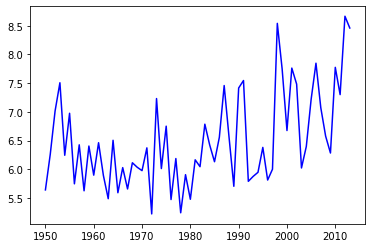

In [165]:
toronto = df[df['City'] == 'Toronto']
mean_year_temp = toronto.groupby(by=toronto['dt'].dt.year)[['AverageTemperature']].mean()
mean_year_temp = mean_year_temp.reset_index()
print(mean_year_temp)

plt.plot(mean_year_temp['dt'], mean_year_temp['AverageTemperature'], color='blue')
plt.show()

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [166]:
variance = df.groupby(by=df['City'])[['AverageTemperature']].var()
variance = variance.reset_index()
variance[variance['AverageTemperature'] == variance['AverageTemperature'].max ()]

,City,AverageTemperature
34,Harbin,218.898616


# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

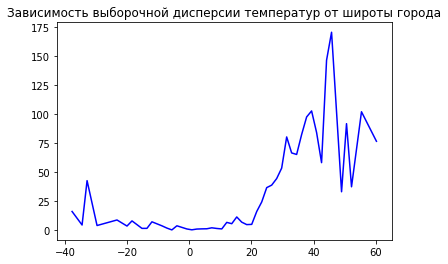

In [167]:
variance = df.groupby(by=df['Latitude'])[['AverageTemperature']].var()
variance = variance.reset_index()

plt.plot(variance['Latitude'], variance['AverageTemperature'], color='blue')
plt.title('Зависимость выборочной дисперсии температур от широты города')
plt.show()

<ipython-input-168-7c130deee0bd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  variance = df.groupby(by=df[df['dt'].dt.year == 1975][df['dt'].dt.month == 1]['Latitude'])[['AverageTemperature']].mean()


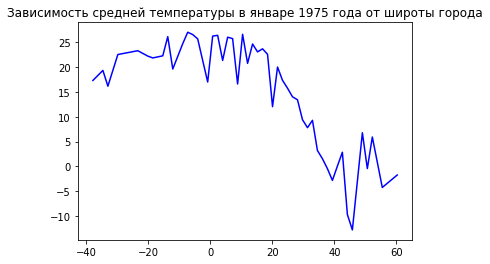

In [168]:
variance = df.groupby(by=df[df['dt'].dt.year == 1975][df['dt'].dt.month == 1]['Latitude'])[['AverageTemperature']].mean()
variance = variance.reset_index()

plt.plot(variance['Latitude'], variance['AverageTemperature'], color='blue')
plt.title('Зависимость средней температуры в январе 1975 года от широты города')
plt.show()

<ipython-input-169-e223158cf140>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  variance = df.groupby(by=df[df['dt'].dt.year == 1950][df['dt'].dt.month == 7]['Latitude'])[['AverageTemperature']].mean()


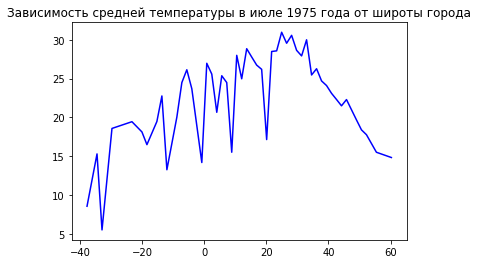

In [169]:
variance = df.groupby(by=df[df['dt'].dt.year == 1950][df['dt'].dt.month == 7]['Latitude'])[['AverageTemperature']].mean()
variance = variance.reset_index()

plt.plot(variance['Latitude'], variance['AverageTemperature'], color='blue')
plt.title('Зависимость средней температуры в июле 1975 года от широты города')
plt.show()

# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

<ipython-input-170-1a1a1f8df172>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dots = mean_spb.groupby(by=mean_spb[mean_spb['dTemp_plus']][mean_spb['dTemp_minus']]['dt'])[['AverageTemperature']].mean()


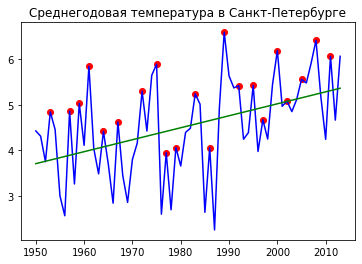

In [170]:
from sklearn.linear_model import LinearRegression
import numpy as np

mean_spb = df.groupby(by=df[df['City'] == 'Saint Petersburg']['dt'].dt.year)[['AverageTemperature']].mean()
mean_spb = mean_spb.reset_index()

mean_spb['dTemp_plus'] = (mean_spb['AverageTemperature'] - mean_spb['AverageTemperature'].shift(1)) > 0
mean_spb['dTemp_minus'] = (mean_spb['AverageTemperature'] - mean_spb['AverageTemperature'].shift(-1)) > 0
dots = mean_spb.groupby(by=mean_spb[mean_spb['dTemp_plus']][mean_spb['dTemp_minus']]['dt'])[['AverageTemperature']].mean()

x = np.array(mean_spb['dt'])
y = np.array(mean_spb['AverageTemperature'])
model = LinearRegression().fit(x.reshape((-1, 1)), y)

k = model.coef_[0]
b = model.intercept_

plt.plot(mean_spb['dt'], mean_spb['AverageTemperature'], color='blue')
plt.scatter(dots.index, dots['AverageTemperature'], color='red')
plt.plot(x, k * x + b, color='green')
plt.title('Среднегодовая температура в Санкт-Петербурге')
plt.show()

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [171]:
mean_all = df.groupby(by=[df['City'], df['dt'].dt.year])[['AverageTemperature']].mean()
mean_all = mean_all.reset_index()
mean_maxmin_diff = mean_all.groupby(by=mean_all['City'])[['AverageTemperature']].max() - mean_all.groupby(by=mean_all['City'])[['AverageTemperature']].min()
mean_maxmin_diff[mean_maxmin_diff['AverageTemperature'] == mean_maxmin_diff['AverageTemperature'].max ()]

,AverageTemperature
City,
Mashhad,5.25


In [172]:
mean_month = df.groupby(by=[df['City'], df['dt'].dt.month])[['AverageTemperature']].mean()
mean_month = mean_month.reset_index()
mean_janjul_diff = abs(mean_month.groupby(by=mean_month[mean_month['dt'] == 1]['City'])[['AverageTemperature']].mean() - mean_month.groupby(by=mean_month[mean_month['dt'] == 7]['City'])[['AverageTemperature']].mean())

mean_janjul_diff[mean_janjul_diff['AverageTemperature'] == mean_janjul_diff['AverageTemperature'].max()]

,AverageTemperature
City,
Harbin,41.992719


# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента. 

In [187]:
df = df[df['dt'] >= '01.01.2003']
newdf = df.groupby(by=[df['Latitude'], df['Longitude'], df['City'], df[df['dt'].dt.month == 1]['dt'].dt.month])[['AverageTemperature']].mean()
newdf = newdf.reset_index()
newdf

,Latitude,Longitude,City,dt,AverageTemperature
0,-37.78,144.41,Melbourne,1.0,20.091545
1,-34.56,151.78,Sydney,1.0,20.608455
2,-32.95,-69.89,Santiago,1.0,13.331545
3,-32.95,18.19,Cape Town,1.0,20.550273
4,-29.74,31.38,Durban,1.0,23.387273
...,...,...,...,...,...
95,50.63,31.69,Kiev,1.0,-4.420273
96,52.24,-0.00,London,1.0,4.480182
97,52.24,13.14,Berlin,1.0,0.486091
98,55.45,36.85,Moscow,1.0,-7.922545


In [188]:
import geopandas
import folium

# Create point geometries
geometry = geopandas.points_from_xy(newdf['Longitude'], newdf['Latitude'])
geo_df = geopandas.GeoDataFrame(
    newdf[["City", "Latitude", "Longitude", "AverageTemperature"]], geometry=geometry
)

geo_df

,City,Latitude,Longitude,AverageTemperature,geometry
0,Melbourne,-37.78,144.41,20.091545,POINT (144.41000 -37.78000)
1,Sydney,-34.56,151.78,20.608455,POINT (151.78000 -34.56000)
2,Santiago,-32.95,-69.89,13.331545,POINT (-69.89000 -32.95000)
3,Cape Town,-32.95,18.19,20.550273,POINT (18.19000 -32.95000)
4,Durban,-29.74,31.38,23.387273,POINT (31.38000 -29.74000)
...,...,...,...,...,...
95,Kiev,50.63,31.69,-4.420273,POINT (31.69000 50.63000)
96,London,52.24,-0.00,4.480182,POINT (-0.00000 52.24000)
97,Berlin,52.24,13.14,0.486091,POINT (13.14000 52.24000)
98,Moscow,55.45,36.85,-7.922545,POINT (36.85000 55.45000)


<AxesSubplot:>

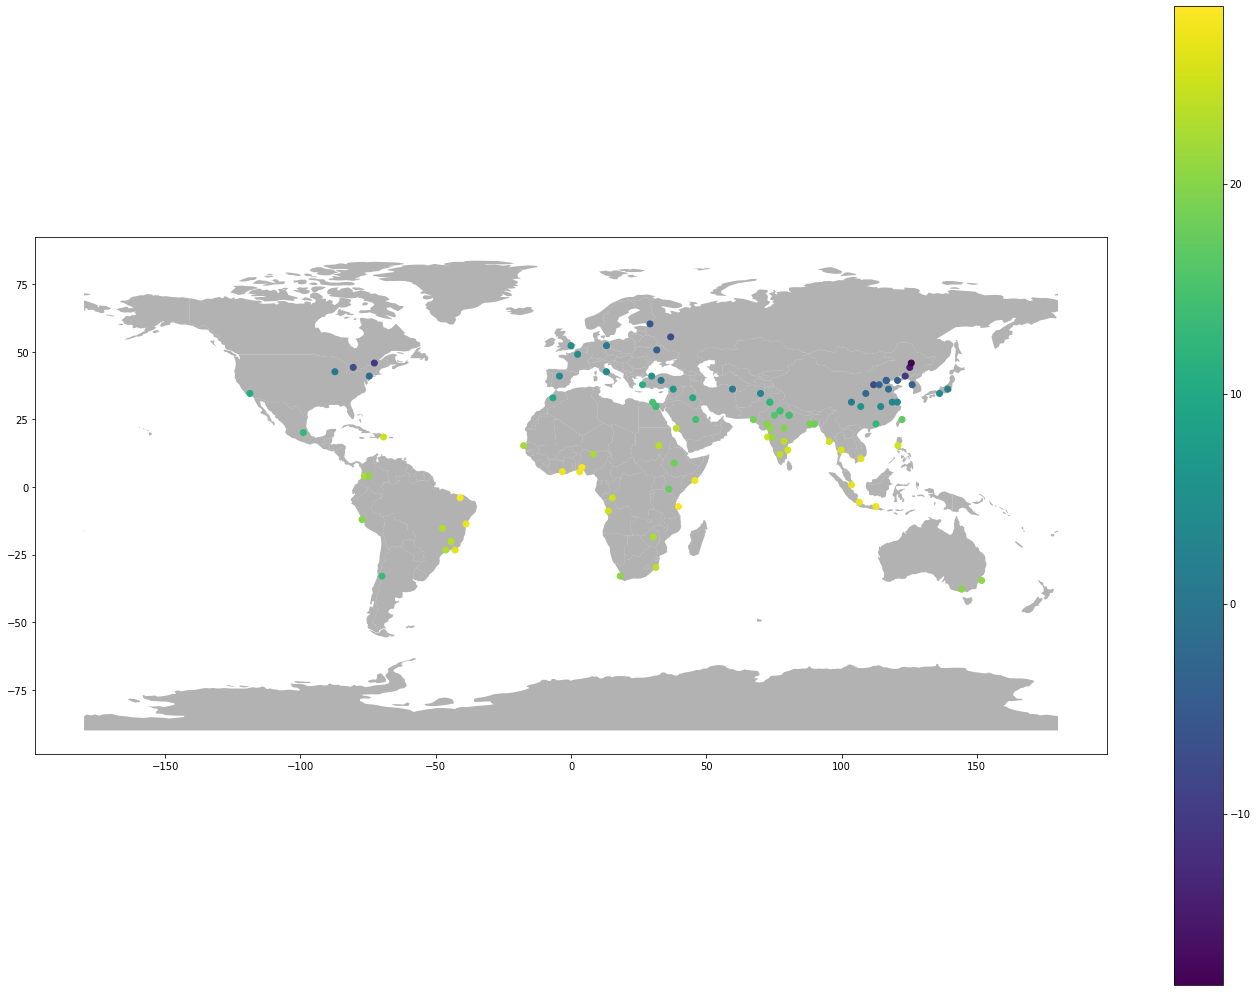

In [190]:
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize=(24, 18))
world.plot(ax=ax, alpha=0.6, color="grey")
geo_df.plot(column = "AverageTemperature", ax=ax, legend=True)

# *Задание 3.8 (8 баллов)

Цель - создать проект, который как минимум включает:
1. Использование юнит-тестов ([pytest](https://pytest.org)).
2. Применение средств форматирования и проверки исходного кода (например: [isort](https://pycqa.github.io/isort/), [black](https://black.readthedocs.io/en/stable/), [flake8](https://flake8.pycqa.org/en/latest/), [mypy](https://mypy.readthedocs.io/en/stable/)).
3. Спецификацию проекта в [pyproject.toml](https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/).
4. Использование утилит для работы с командной строкой ([argparse](https://docs.python.org/3/library/argparse.html), [click](https://click.palletsprojects.com/en/8.1.x/) и т.п.)
5. Сборку проекта в Wheel-файл.

Проект должен быть загружен в репозиторий. Функционал - произвольный, но должны использоваться данные из этого домашнего задания. Сам файл передается в качестве первого аргумента командной строки.  Например:

> python3 -m homeproject.app GlobalLandTemperaturesByMajorCity.csv 1980

Выдает самый жаркий месяц и город по наблюдениям за 1980 год.

*Ссылка на проект*